### 1. Import Dependencies

In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
import joblib
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

### 2. Basic Processing

In [35]:
df = pd.read_csv(r"D:\Study\Model X\Dementia Prediction\Dataset\Processed\Feature_Engineered.csv")
df.head()

,BIRTHMO,BIRTHYR,SEX,EDUC,NACCAGE,NACCAGEB,INRELTO,TOBAC30,TOBAC100,SMOKYRS,...,INCONTF_2.0,ALCOHOL_0.0,ALCOHOL_1.0,ALCOHOL_2.0,ABUSOTHR_0.0.1,ABUSOTHR_1.0.1,ABUSOTHR_2.0.1,PSYCDIS_0.0.1,PSYCDIS_1.0.1,PSYCDIS_2.0.1
0,-0.142857,0.8125,1,0.0,-0.384615,-0.076923,1.0,0.0,0.0,0.0,...,False,True,False,False,True,False,False,True,False,False
1,-0.142857,0.8125,1,0.0,-0.307692,-0.076923,1.0,0.0,0.0,0.0,...,False,True,False,False,True,False,False,True,False,False
2,0.857143,1.0625,1,0.0,-0.692308,-0.384615,1.0,0.0,0.0,0.0,...,False,True,False,False,True,False,False,True,False,False
3,-0.714286,1.1875,0,0.0,-0.923077,-0.615385,1.0,0.0,0.0,0.0,...,False,True,False,False,True,False,False,True,False,False
4,-0.571429,0.3750,1,-1.0,0.153846,0.461538,3.0,0.0,0.0,0.0,...,False,True,False,False,True,False,False,True,False,False


In [ ]:
X_train_smote = joblib.load("D:\Study\Model X\Dementia Prediction\Data_Preprocessing\Artifacts\y_train_smote.pkl")
y_train_smote = joblib.load("D:\Study\Model X\Dementia Prediction\Data_Preprocessing\Artifacts\X_train_smote.pkl")
X_test = joblib.load("D:\Study\Model X\Dementia Prediction\Data_Preprocessing\Artifacts\X_test.pkl")
y_test = joblib.load("D:\Study\Model X\Dementia Prediction\Data_Preprocessing\Artifacts\y_test.pkl")

### 3. Modelling

In [49]:
# Features and target
X = df.drop(columns=['DEMENTED'])
y = df['DEMENTED']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

In [13]:
# Define models
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced"),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, scale_pos_weight=2.39),
    'CatBoost': CatBoostClassifier(verbose=0, random_state=42, auto_class_weights="Balanced"),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42, class_weight="balanced"),
    'DecisionTree': DecisionTreeClassifier(random_state=42, class_weight="balanced")
}


In [14]:
## Stratified K-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)

In [53]:
# Train and evaluate
results = {}

for name, model in models.items():
    roc_auc_scores = []
    f1_scores = []

for name, model in models.items():
    roc_auc_scores = []
    f1_scores = []

    for train_idx, val_idx in cv.split(X_train_smote, y_train_smote):
        X_tr, X_val = X_train_smote.iloc[train_idx], X_train_smote.iloc[val_idx]
        y_tr, y_val = y_train_smote.iloc[train_idx], y_train_smote.iloc[val_idx]

        model.fit(X_tr, y_tr)
        y_pred = model.predict(X_val)

        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_val)[:, 1]
        else:
            y_prob = model.decision_function(X_val)
        
        roc_auc_scores.append(roc_auc_score(y_val, y_prob))
        f1_scores.append(f1_score(y_val, y_pred))

    results[name] = {
        'ROC-AUC': np.mean(roc_auc_scores),
        'F1-score': np.mean(f1_scores)
    }


C:\Users\Mitheesha\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [18:57:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Mitheesha\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [18:57:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Mitheesha\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [18:57:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Mitheesha\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [18:57:17] WARNING: C:\actions-runner\_work\xgboost\xgbo

In [54]:
results_df = pd.DataFrame(results).T
results_df.sort_values(by='ROC-AUC', ascending=False)

,ROC-AUC,F1-score
RandomForest,0.980372,0.935359
CatBoost,0.974946,0.930107
XGBoost,0.971415,0.925137
LogisticRegression,0.955497,0.911558
DecisionTree,0.901122,0.900750


In [57]:
# Define the top models with reasonable parameters
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
xgb = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', n_jobs=-1, random_state=42)
cat = CatBoostClassifier(iterations=200, verbose=0, thread_count=-1, random_state=42)

In [58]:
# Build the soft-voting ensemble
voting_clf = VotingClassifier(
    estimators=[('rf', rf), ('xgb', xgb), ('cat', cat)],
    voting='soft'  # use predicted probabilities
)

In [61]:
roc_auc_scores = []
f1_scores = []

for train_idx, val_idx in cv.split(X_train_smote, y_train_smote):
    X_tr, X_val = X_train_smote.iloc[train_idx], X_train_smote.iloc[val_idx]
    y_tr, y_val = y_train_smote.iloc[train_idx], y_train_smote.iloc[val_idx]
    
    voting_clf.fit(X_tr, y_tr)
    
    y_pred = voting_clf.predict(X_val)
    y_prob = voting_clf.predict_proba(X_val)[:, 1]
    
    roc_auc_scores.append(roc_auc_score(y_val, y_prob))
    f1_scores.append(f1_score(y_val, y_pred))

C:\Users\Mitheesha\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [19:07:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Mitheesha\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [19:07:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Mitheesha\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [19:07:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Mitheesha\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [19:08:19] WARNING: C:\actions-runner\_work\xgboost\xgbo

In [62]:
print("Voting Ensemble ROC-AUC:", np.mean(roc_auc_scores))
print("Voting Ensemble F1-score:", np.mean(f1_scores))

Voting Ensemble ROC-AUC: 0.9807649092246132
Voting Ensemble F1-score: 0.9317753952854574


In [63]:
rf.fit(X, y)
xgb.fit(X, y)
cat.fit(X, y)

C:\Users\Mitheesha\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [19:13:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [64]:
joblib.dump(rf, f"D:\Study\Model X\Dementia Prediction\Models\\rf_model.pkl")
joblib.dump(xgb, f"D:\Study\Model X\Dementia Prediction\Models\\xgb_model.pkl")
joblib.dump(cat, f"D:\Study\Model X\Dementia Prediction\Models\\cat_model.pkl")

['D:\\Study\\Model X\\Dementia Prediction\\Models\\cat_model.pkl']

In [65]:
voting_clf.fit(X, y)  # fit the ensemble on the full dataset
joblib.dump(voting_clf, f"D:\Study\Model X\Dementia Prediction\Models\\VotingEnsemble_model.pkl")

C:\Users\Mitheesha\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [19:13:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


['D:\\Study\\Model X\\Dementia Prediction\\Models\\VotingEnsemble_model.pkl']

### 4. Testing the model

In [68]:
test_samples = X.sample(5, random_state=42)
test_labels = y.loc[test_samples.index]

test_samples

,BIRTHMO,BIRTHYR,SEX,EDUC,NACCAGE,NACCAGEB,INRELTO,TOBAC30,TOBAC100,SMOKYRS,...,INCONTF_2.0,ALCOHOL_0.0,ALCOHOL_1.0,ALCOHOL_2.0,ABUSOTHR_0.0.1,ABUSOTHR_1.0.1,ABUSOTHR_2.0.1,PSYCDIS_0.0.1,PSYCDIS_1.0.1,PSYCDIS_2.0.1
103057,-0.285714,-1.1250,0,-1.00,1.615385,1.384615,2.0,0.0,0.0,0.0,...,False,True,False,False,True,False,False,True,False,False
194815,-0.285714,-0.2500,0,0.50,0.000000,0.307692,2.0,0.0,1.0,0.0,...,False,True,False,False,True,False,False,True,False,False
118282,-0.285714,-0.6875,0,-0.75,0.384615,0.615385,2.0,0.0,0.0,0.0,...,False,True,False,False,True,False,False,True,False,False
139989,-0.285714,-0.4375,1,-1.00,0.384615,0.461538,1.0,0.0,1.0,1.5,...,False,True,False,False,True,False,False,True,False,False
89122,0.571429,-0.0625,0,0.00,0.000000,0.076923,2.0,0.0,0.0,0.0,...,False,True,False,False,True,False,False,True,False,False


In [75]:
# Predictions
for model_name, model in [('RandomForest', rf), ('XGBoost', xgb), ('CatBoost', cat), ('VotingEnsemble', voting_clf)]:
    y_pred_class = model.predict(test_samples)
    y_pred_prob = model.predict_proba(test_samples)[:,1]
    
    print(f"{model_name}")
    print("Predicted classes:", y_pred_class)
    print("Predicted probabilities:", np.round(y_pred_prob, 3))
    print()

RandomForest
Predicted classes: [1 0 1 0 1]
Predicted probabilities: [0.93 0.   0.98 0.   0.9 ]

XGBoost
Predicted classes: [0 0 1 0 1]
Predicted probabilities: [0.489 0.058 0.767 0.121 0.834]

CatBoost
Predicted classes: [1 0 1 0 1]
Predicted probabilities: [0.631 0.043 0.704 0.082 0.856]

VotingEnsemble
Predicted classes: [1 0 1 0 1]
Predicted probabilities: [0.684 0.034 0.817 0.068 0.863]



In [76]:
print("True labels:", test_labels.values)

True labels: [1 0 1 0 1]


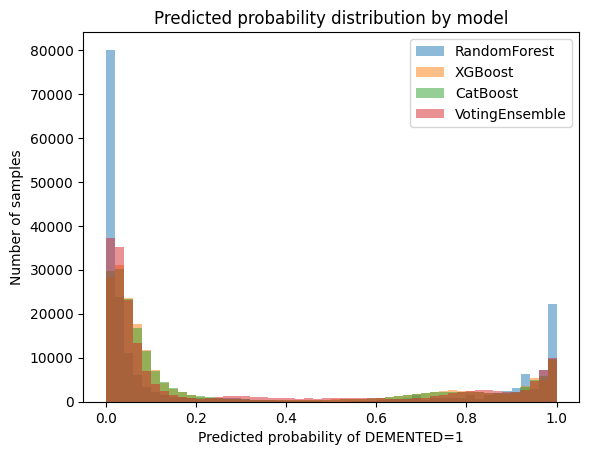

In [74]:
import matplotlib.pyplot as plt

for model_name, model in [('RandomForest', rf), ('XGBoost', xgb), ('CatBoost', cat), ('VotingEnsemble', voting_clf)]:
    probs = model.predict_proba(X)[:,1]
    plt.hist(probs, bins=50, alpha=0.5, label=model_name)

plt.xlabel("Predicted probability of DEMENTED=1")
plt.ylabel("Number of samples")
plt.title("Predicted probability distribution by model")
plt.legend()
plt.show()